# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Nic Vetter   |    GitHub Link: https://github.com/VetterNic2/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [5]:
# Imports:

import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import pickle
import requests
import nltk

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [3]:
import requests

# URL of the webpage
url = 'https://www.choc.org/news/football-concussion-worth-risk/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    
    # Save the HTML content to a file
    with open('football_concussion_article.html', 'w', encoding='utf-8') as f:
        f.write(html_content)
        
    print('HTML content saved to football_concussion_article.html')
else:
    print('Failed to fetch the webpage. Status code:', response.status_code)


HTML content saved to football_concussion_article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [9]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Reading content
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parsing
soup = BeautifulSoup(html_content, 'html.parser')

# Extraction of Text
article_text = soup.get_text()

# Sentiment
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Print Polarity Score
print('Polarity Score:', polarity_score)

# Punctuation Mark defining! I think this is pretty cool!
punctuation_marks = ['.', '!', '?']

# Sentence Counter
num_sentences = sum(article_text.count(p) for p in punctuation_marks)

# if statement for the last sentence if it doesn't have an ending punctuation
if article_text.strip()[-1] not in punctuation_marks:
    num_sentences += 1

# Print # of Sentences
print('Number of Sentences:', num_sentences)



Polarity Score: 0.09021855725395547
Number of Sentences: 77


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [31]:
from collections import Counter
from bs4 import BeautifulSoup
import spacy

# SpaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

article_text = soup.get_text()

# Processing
doc = nlp(article_text)

# Counter for tokens
token_counter = Counter()

for token in doc:
    if not token.is_stop and not token.is_punct:
        token_text = token.text.lower()  # Use token text instead of lemma
        if token_text.strip() and token_text != '|':  # Check if token is not empty after stripping
            token_counter[token_text] += 1

# Get the 5 most common tokens
common_tokens = token_counter.most_common(5)

print('5 Most Common Tokens:')
for token, frequency in common_tokens:
    print(token)

print('\nTokens and Their Frequencies:')
for token, frequency in token_counter.items():
    print(f'{token}: {frequency}')



5 Most Common Tokens:
football
concussion
choc
child
brain

Tokens and Their Frequencies:
football: 24
concussion: 23
worth: 3
risk: 6
choc: 15
children: 6
skip: 2
main: 3
content: 1
choc.org: 1
search: 1
donate: 5
number: 1
714: 3
997: 2
3000: 2
customer: 1
service: 1
509: 1
3200: 1
24/7: 1
nurse: 1
advice: 1
844: 1
contact: 9
directions: 2
news: 3
media: 5
resources: 3
quality: 1
patient: 7
safety: 2
family: 1
centered: 1
care: 2
docs: 1
providers: 1
residency: 1
training: 1
programs: 2
foundation: 1
locations: 3
campus: 1
orange: 2
mission: 1
hospital: 3
specialty: 2
centers: 1
human: 1
list: 2
services: 7
primary: 2
wellness: 1
mental: 1
health: 3
institutes: 1
cancer: 1
heart: 1
neuroscience: 1
orthopaedics: 1
research: 3
innovation: 1
featured: 1
emergency: 1
department: 1
surgical: 1
neonatal: 1
nicu: 1
want: 3
find: 4
provider: 1
appointment: 1
access: 1
portal: 2
explore: 1
career: 1
opportunities: 1
estimate: 1
charges: 1
pay: 2
bill: 2
request: 3
medical: 5
records: 3
downlo

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [32]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# SpaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

article_text = soup.get_text()

# Processing
doc = nlp(article_text)

# Counter for lemmas
lemma_counter = Counter()

for token in doc:
    if not token.is_stop and not token.is_punct:
        lemma = token.lemma_.lower()
        if lemma.strip():  
            lemma_counter[lemma] += 1

# Get the 5 most common lemmas
common_lemmas = lemma_counter.most_common(6)

print('5 Most Common Lemmas (excluding "|"):')
for lemma, frequency in common_lemmas:
    if lemma.strip() != '|':
        print(lemma)

print('\nLemmas and Their Frequencies (excluding "|"):')
for lemma, frequency in lemma_counter.items():
    if lemma.strip() != '|':
        print(f'{lemma}: {frequency}')


5 Most Common Lemmas (excluding "|"):
concussion
football
child
choc
play

Lemmas and Their Frequencies (excluding "|"):
football: 24
concussion: 28
worth: 3
risk: 7
choc: 15
children: 2
skip: 2
main: 3
content: 1
choc.org: 1
search: 1
donate: 5
number: 1
714: 3
997: 2
3000: 2
customer: 1
service: 1
509: 1
3200: 1
24/7: 1
nurse: 1
advice: 1
844: 1
contact: 10
directions: 2
news: 3
media: 3
resources: 2
quality: 1
patient: 7
safety: 2
family: 1
centered: 1
care: 2
docs: 1
providers: 1
residency: 1
training: 1
programs: 1
foundation: 1
location: 1
campus: 1
orange: 2
mission: 1
hospital: 3
specialty: 2
centers: 1
human: 1
list: 2
locations: 2
services: 7
primary: 2
wellness: 1
mental: 1
health: 3
institutes: 1
cancer: 1
heart: 1
neuroscience: 1
orthopaedics: 1
research: 3
innovation: 1
featured: 1
emergency: 1
department: 1
surgical: 1
neonatal: 1
nicu: 1
want: 3
find: 6
provider: 1
appointment: 1
access: 1
portal: 2
explore: 1
career: 1
opportunity: 1
estimate: 1
charge: 1
pay: 2
bill: 

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

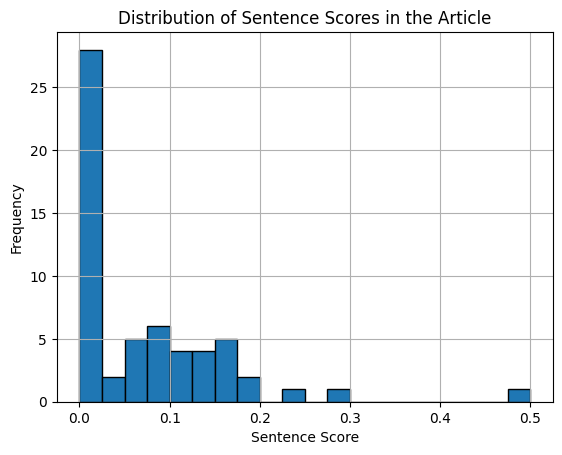

In [35]:
import spacy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# SpaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

article_text = soup.get_text()

# Processing
doc = nlp(article_text)


sentence_scores = []

# Define important tokens
important_tokens = ["concussion", "football", "player", "injury"]  

for sentence in doc.sents:
    token_count = sum(1 for token in sentence if not token.is_stop and not token.is_punct)
    important_token_count = sum(1 for token in sentence if token.text.lower() in important_tokens)
    
    
    if token_count > 0:
        score = important_token_count / token_count
    else:
        score = 0  
    
    sentence_scores.append(score)

# Plot histogram
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Scores in the Article')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The most common range of scores is the sentence score of 0-0.025. I think this is because of the ads within the article and things like that.  



6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

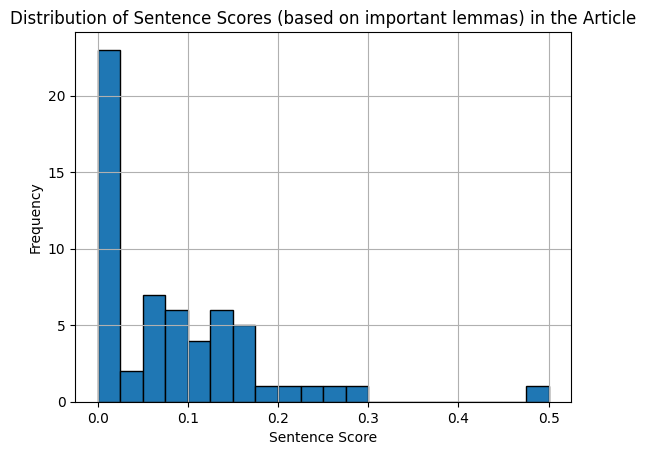

In [37]:
import spacy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter

# SpaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

article_text = soup.get_text()

# Processing
doc = nlp(article_text)


sentence_scores = []


important_lemmas = ["concussion", "football", "player", "injury"]  # You can extend this list with more relevant lemmas

for sentence in doc.sents:
    lemma_counter = Counter(token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct)
    important_lemma_count = sum(lemma_counter[lemma] for lemma in important_lemmas)
    total_lemma_count = sum(lemma_counter.values())
    

    if total_lemma_count > 0:
        score = important_lemma_count / total_lemma_count
    else:
        score = 0  
    
    sentence_scores.append(score)

# Plot histogram
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Scores (based on important lemmas) in the Article')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): Excluding the first column of 0-.025, the cutoff score would be .14
* Cutoff Score (lemmas):Excluding the first column of 0-.025, the cutoff score would be .12

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [39]:
import spacy
from bs4 import BeautifulSoup

# SpaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

article_text = soup.get_text()

# Processing
doc = nlp(article_text)

# Scores for each sentence
sentence_scores = []


important_tokens = ["concussion", "football", "player", "injury"] 

for sentence in doc.sents:
    token_count = sum(1 for token in sentence if not token.is_stop and not token.is_punct)
    important_token_count = sum(1 for token in sentence if token.text.lower() in important_tokens)
    

    if token_count > 0:
        score = important_token_count / token_count
    else:
        score = 0  # Handle case when the sentence has no meaningful tokens
    
    sentence_scores.append(score)


cutoff_score = 0.14 


summary_list = []

# Adding together the sentences with scores above the cutoff to the summary list
for sentence, score in zip(doc.sents, sentence_scores):
    if score > cutoff_score:
        summary_list.append(sentence.text.strip())

# Printing
summary_text = ' '.join(summary_list)
print(summary_text)


Head injury. According to HealthResearchFunding.org, concussion rates for children under age 19 who play tackle football have doubled over the last decade, most occurring during practices. It also spurred increasing concern about whether children should be playing football at all. “There is no conclusive evidence that shows us children shouldn’t play football,” she claimed. He also advocates core strengthening exercises as a part of football practice. “There is some research showing that core and neck strengthening can help to prevent traumatic brain injury during football,” he said. Some things to consider for kids who do play football:

Learn the youth concussion laws in your state. While all states now have laws designed to reduce risk of concussion and other head injuries in youth football, not all state laws are equal, according to USA Football. “It’s very helpful to do at the beginning of the season and then repeat if there are signs of concussion. Know the symptoms of concussion

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [53]:
import spacy

# Load a pre-trained spaCy pipeline for sentiment analysis
nlp_sentiment = spacy.load("en_core_web_sm")

# Process the summary text using spaCy for sentiment analysis
summary_doc = nlp_sentiment(summary_text)

# Use the sentiment score of the summary directly as its polarity score
summary_polarity_score = summary_doc.sentiment

# Print the polarity score of the summary with an appropriate label
print("Polarity Score of the Summary (Tokens):", summary_polarity_score)

# Count the number of sentences in the summarized article
num_sentences_summary = len(list(summary_doc.sents))

# Print the number of sentences in the summarized article with an appropriate label
print("Number of Sentences in the Summarized Article:", num_sentences_summary)


Polarity Score of the Summary (Tokens): 0.0
Number of Sentences in the Summarized Article: 1


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [50]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# SpaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML
with open('football_concussion_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Processing
doc = nlp(article_text)

# Scores for each sentence based on lemmas
sentence_lemma_scores = []

# Define important lemmas
important_lemmas = ["concussion", "football", "player", "injury"] 

for sentence in doc.sents:
    lemma_counter = Counter(token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct)
    important_lemma_count = sum(lemma_counter[lemma] for lemma in important_lemmas)
    total_lemma_count = sum(lemma_counter.values())
    
    # Calculate score as the ratio of important lemmas to total lemmas
    if total_lemma_count > 0:
        score = important_lemma_count / total_lemma_count
    else:
        score = 0  # Handle case when the sentence has no meaningful lemmas
    
    sentence_lemma_scores.append(score)

# Cutoff score for lemma-based summary
cutoff_score_lemmas = 0.12

# Create a summary list based on lemmas
summary_list_lemmas = []

# Add sentences with scores above the cutoff to the summary list
for sentence, score in zip(doc.sents, sentence_lemma_scores):
    if score > cutoff_score_lemmas:
        summary_list_lemmas.append(sentence.text.strip())

# Generate the summary text based on lemmas
summary_text_lemmas = ' '.join(summary_list_lemmas)

# Print the summary
print("Summary based on Lemmas:")
print(summary_text_lemmas)


Summary based on Lemmas:
Head injury. According to HealthResearchFunding.org, concussion rates for children under age 19 who play tackle football have doubled over the last decade, most occurring during practices. This finding, as well as his subsequent reports of CTE in other deceased NFL players, eventually led to the book and later the 2015 film, “Concussion.” It also spurred increasing concern about whether children should be playing football at all. “There is no conclusive evidence that shows us children shouldn’t play football,” she claimed. But he does believe that such injuries may be prevented by introducing kids first to non-impact football, allowing them to develop skills before playing the contact game. He also advocates core strengthening exercises as a part of football practice. “There is some research showing that core and neck strengthening can help to prevent traumatic brain injury during football,” he said. Some things to consider for kids who do play football:

Learn

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [52]:
import spacy

nlp_sentiment = spacy.load("en_core_web_sm")

# Process the summary text based on lemmas using spaCy for sentiment analysis
summary_doc_lemmas = nlp_sentiment(summary_text_lemmas)

summary_polarity_score_lemmas = summary_doc_lemmas.sentiment

print("Polarity Score of the Summary (Lemmas):", summary_polarity_score_lemmas)

num_sentences_summary_lemmas = len(list(summary_doc_lemmas.sents))

print("Number of Sentences in the Summarized Article (Lemmas):", num_sentences_summary_lemmas)


Polarity Score of the Summary (Lemmas): 0.0
Number of Sentences in the Summarized Article (Lemmas): 15


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.

## Both of my polarity scores are 0. I am not surprised by this because it is simply an informative article about the the possibility of concussions for young football players. 
## However, the thing that has been driving me crazy, is that the token polarity score is only reading 1 sentence. I can't seem to figure it out using ChatGPT, but I do expect it to be around 0 anyway. 
## Throughout my research of informative/health articles, they often come back with a 0 polarity score. This is because they aren't "hit pieces" and are generally filled with facts in an unbiased fashion. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

## The summary that I think is better is the Lemma summary. This is because it included all 15 sentences and still showed a polarity score of 0. 
## Like I said before, I am not surprised that this article was so down the middle, but now I can say that I proved it throughout my analysis in this final project. 
## I hope you enjoyed reading through my project and thank you for the great class!

In [54]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 410330 bytes to article-summarizer.html
